In [1]:
%matplotlib inline 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [4]:
harsha = ['C:\Users\Chakradhar\Desktop\harsha\datasets\load prediction\load data residential\RESIDENTIAL_LOAD_DATA_E_PLUS_OUTPUT\BASE\USA_AK_Anchorage.Intl.AP.702730_TMY3_BASE.csv','']
dk = ['/Volumes/Adithya/Adithya/ML/DATA SETS/TMY3 /USA_AK_Anchorage.Intl.AP.702730_TMY3_BASE.csv','/Volumes/Adithya/Adithya/ML/DATA SETS/TMY3 /USA_AK_Anchorage.Intl.AP.Weather.CSV']
sid = ['/media/siddharth/New Volume/Github/My Analysis - SF/USA_AK_Anchorage.Intl.AP.702730_TMY3_BASE.csv','/media/siddharth/New Volume/Github/My Analysis - SF/Anchorage_Weather.csv']

if('adithya8.0.0' in os.getcwd()):
    path = dk[0]
    path_weather = dk[1]
elif('siddharth' in os.getcwd()):
    path = sid[0]
    path_weather = sid[1]
else:
    path = harsha[0]
    path_weather = harsha[1]

df=pd.read_csv(path)
df_weather = pd.read_csv(path_weather)

print df.shape
print df_weather.columns


(8760, 14)
Index([u'Date (MM/DD/YYYY)', u'Time (HH:MM)', u'ETR (W/m^2)', u'ETRN (W/m^2)',
       u'GHI (W/m^2)', u'GHI source', u'GHI uncert (%)', u'DNI (W/m^2)',
       u'DNI source', u'DNI uncert (%)', u'DHI (W/m^2)', u'DHI source',
       u'DHI uncert (%)', u'GH illum (lx)', u'GH illum source',
       u'Global illum uncert (%)', u'DN illum (lx)', u'DN illum source',
       u'DN illum uncert (%)', u'DH illum (lx)', u'DH illum source',
       u'DH illum uncert (%)', u'Zenith lum (cd/m^2)', u'Zenith lum source',
       u'Zenith lum uncert (%)', u'TotCld (tenths)', u'TotCld source',
       u'TotCld uncert (code)', u'OpqCld (tenths)', u'OpqCld source',
       u'OpqCld uncert (code)', u'Dry-bulb (C)', u'Dry-bulb source',
       u'Dry-bulb uncert (code)', u'Dew-point (C)', u'Dew-point source',
       u'Dew-point uncert (code)', u'RHum (%)', u'RHum source',
       u'RHum uncert (code)', u'Pressure (mbar)', u'Pressure source',
       u'Pressure uncert (code)', u'Wdir (degrees)', u'Wdir sourc

a=np.genfromtxt(r'C:\Users\Chakradhar\Desktop\harsha\datasets\load prediction\load data residential\RESIDENTIAL_LOAD_DATA_E_PLUS_OUTPUT\BASE\USA_AK_Anchorage.Intl.AP.702730_TMY3_BASE.csv)

In [7]:
df_set= df['Electricity:Facility [kW](Hourly)']
values = pd.DataFrame(df_set.values)


dataframe = pd.concat([values.shift(2),values.shift(1), values], axis=1)
#above line is same as dataframe = np.hstack( (np.hstack(( values[2:], values[1:-2])) , values[:-3] ) )

dataframe.columns = ['t-2', 't-1','t']

# To remove the NaN values
dataframe= pd.DataFrame(dataframe[2:])


print dataframe

x = dataframe.loc[:,'t-2':'t-1']
y = dataframe['t']




           t-2       t-1         t
2     1.019364  0.887116  0.833463
3     0.887116  0.833463  0.818020
4     0.833463  0.818020  0.812916
5     0.818020  0.812916  0.865135
6     0.812916  0.865135  1.087779
7     0.865135  1.087779  1.429298
8     1.087779  1.429298  1.382221
9     1.429298  1.382221  1.220633
10    1.382221  1.220633  1.271489
11    1.220633  1.271489  1.291682
12    1.271489  1.291682  1.215100
13    1.291682  1.215100  1.169484
14    1.215100  1.169484  1.169849
15    1.169484  1.169849  1.252507
16    1.169849  1.252507  1.525574
17    1.252507  1.525574  2.067353
18    1.525574  2.067353  2.371010
19    2.067353  2.371010  2.320927
20    2.371010  2.320927  2.170542
21    2.320927  2.170542  2.013591
22    2.170542  2.013591  1.694778
23    2.013591  1.694778  1.375976
24    1.694778  1.375976  1.058186
25    1.375976  1.058186  0.935044
26    1.058186  0.935044  0.898032
27    0.935044  0.898032  0.888657
28    0.898032  0.888657  0.886075
29    0.888657  0.88

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(7006, 2)
(1752, 2)
(7006,)
(1752,)


the alpha is  0.1
the MSE is  0.0115148911294
0.933792271954


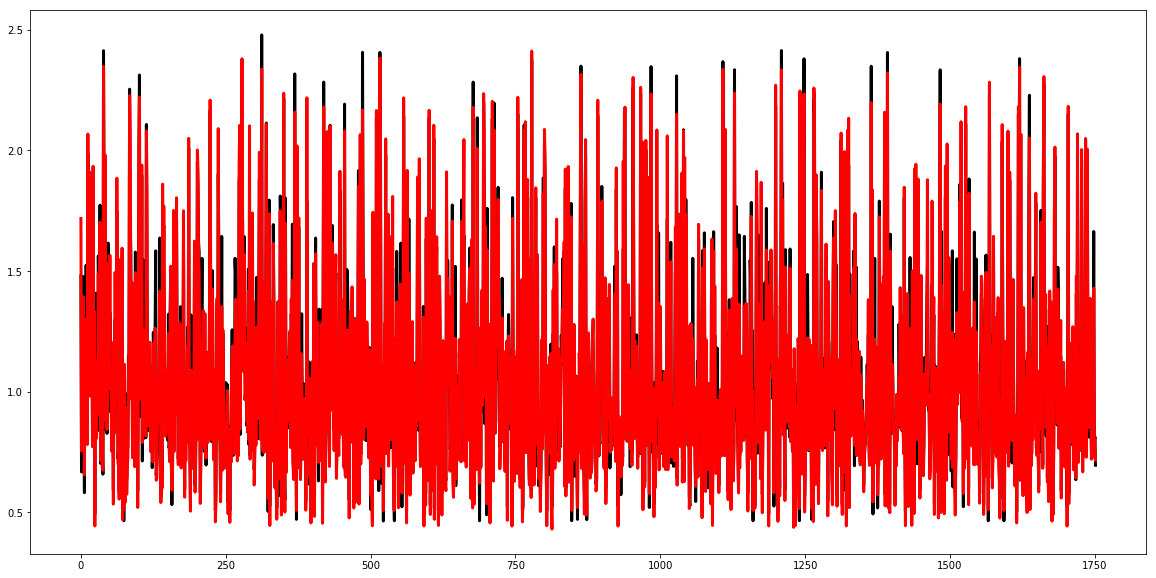

In [9]:
reg=linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0))
reg.fit(x_train,y_train)

prediction= reg.predict(x_test)

print "the alpha is ", reg.alpha_
print "the MSE is ", mean_squared_error(prediction,y_test)

plt.figure(figsize=(20,10))

#plt.scatter(x_test, y_test,  color='black')

plt.plot( prediction, color='k', linewidth=3)
plt.plot(y_test.tolist(), color='r',linewidth=3)
score=reg.score(x_test,y_test)
print score

plt.show()

(6739, 6) (1685, 6) (1685,)
the alpha is  0.1
the MSE is  0.00443929984944
0.972960855059


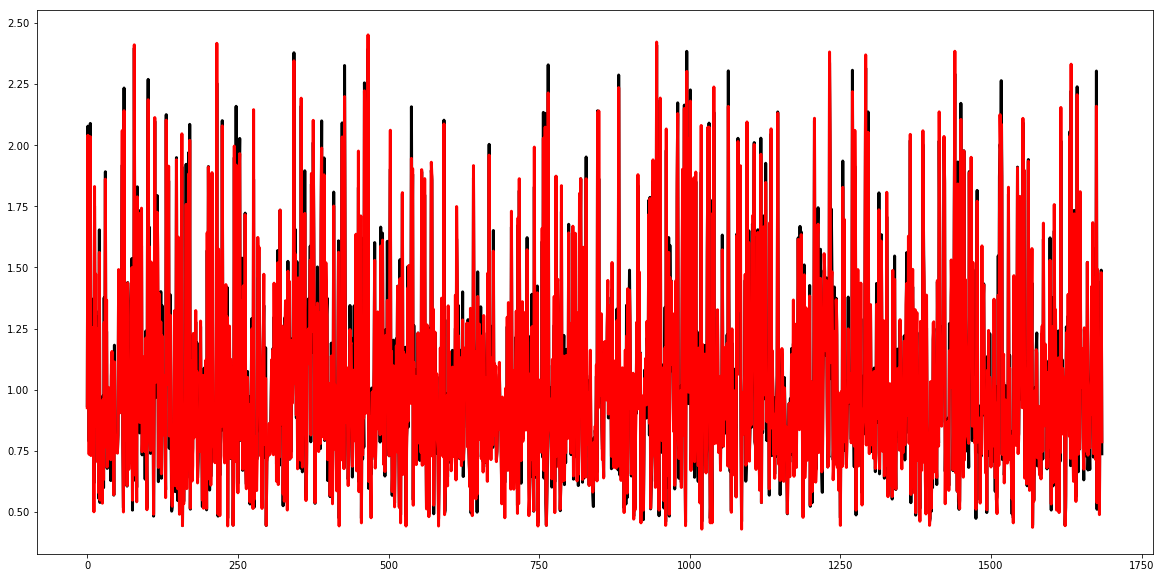

In [10]:
df_set= pd.Series(df['Electricity:Facility [kW](Hourly)'])

values1 = pd.DataFrame(df_set.values)

#t-2 weeks corresponds to 336 hours, t-2 weeks to 168 hours and so on
qwe=pd.concat([values1.shift(336),values1.shift(168),values1.shift(4),values1.shift(3),values1.shift(2),values1.shift(1),values1],axis=1)

qwe.columns=['t-2weeks','t-1week','t-4','t-3','t-2','t-1','t']

#removing NaN
qwe=qwe[336:]

qwe=pd.DataFrame(qwe)

x1=qwe.loc[:,'t-2weeks':'t-1']
y1=qwe['t']

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)
print x1_train.shape,x1_test.shape,y1_test.shape

reg1=linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0))
reg1.fit(x1_train,y1_train)

prediction= reg1.predict(x1_test)
print "the alpha is ", reg1.alpha_
print "the MSE is ", mean_squared_error(prediction,y1_test)

plt.figure(figsize=(20,10))

plt.plot( prediction, color='k', linewidth=3)
plt.plot(y1_test.tolist(), color='r',linewidth=3)

print reg1.score(x1_test,y1_test)

plt.show()


In [11]:
y_test

2251    1.718015
1465    0.754109
6440    0.845468
5949    1.226484
6861    1.392872
1164    1.165284
6600    0.654864
6607    1.092774
313     0.959259
4821    1.234365
3883    1.304209
3205    0.780956
1026    2.068058
7005    1.367327
923     1.101443
4243    1.272307
2696    0.981307
8277    1.909564
3355    1.480532
3114    1.258365
4282    0.771601
2108    1.934551
4398    0.866881
8623    1.332514
5377    0.443038
7039    1.126526
2725    0.802824
2577    0.987230
5848    1.043939
2118    0.904171
          ...   
2463    1.011258
3718    0.968227
2080    1.130691
4019    0.755399
7211    1.088404
1580    2.003784
967     1.324660
5903    0.667053
6826    0.972949
8738    0.757236
6790    1.075738
5912    0.796371
1146    2.049656
7394    0.727897
2584    1.201276
1988    2.005504
27      0.888657
4864    1.027822
5286    0.850911
1104    1.010223
5659    1.386551
2264    0.944867
2187    0.719942
3800    0.764899
4307    0.727234
7356    1.055098
56      1.429206
5343    0.8094

In [12]:
df_weather.columns

Index([u'Date (MM/DD/YYYY)', u'Time (HH:MM)', u'ETR (W/m^2)', u'ETRN (W/m^2)',
       u'GHI (W/m^2)', u'GHI source', u'GHI uncert (%)', u'DNI (W/m^2)',
       u'DNI source', u'DNI uncert (%)', u'DHI (W/m^2)', u'DHI source',
       u'DHI uncert (%)', u'GH illum (lx)', u'GH illum source',
       u'Global illum uncert (%)', u'DN illum (lx)', u'DN illum source',
       u'DN illum uncert (%)', u'DH illum (lx)', u'DH illum source',
       u'DH illum uncert (%)', u'Zenith lum (cd/m^2)', u'Zenith lum source',
       u'Zenith lum uncert (%)', u'TotCld (tenths)', u'TotCld source',
       u'TotCld uncert (code)', u'OpqCld (tenths)', u'OpqCld source',
       u'OpqCld uncert (code)', u'Dry-bulb (C)', u'Dry-bulb source',
       u'Dry-bulb uncert (code)', u'Dew-point (C)', u'Dew-point source',
       u'Dew-point uncert (code)', u'RHum (%)', u'RHum source',
       u'RHum uncert (code)', u'Pressure (mbar)', u'Pressure source',
       u'Pressure uncert (code)', u'Wdir (degrees)', u'Wdir source',
       

In [14]:
df_weather_copy = df_weather[['DNI (W/m^2)','Dry-bulb (C)','RHum (%)','Wspd (m/s)']]

In [15]:
df_weather_copy.columns

Index([u'DNI (W/m^2)', u'Dry-bulb (C)', u'RHum (%)', u'Wspd (m/s)'], dtype='object')

In [17]:
ylab = df['Electricity:Facility [kW](Hourly)']

In [18]:
scaler = StandardScaler()
scaler.fit(df_weather_copy.values)
df_new = scaler.transform(df_weather_copy.values)

x_train, x_test, y_train, y_test = train_test_split(df_new, ylab, test_size=0.2, random_state=1)
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(7008, 4)
(1752, 4)
(7008,)
(1752,)


the alpha is  10.0
the MSE is  0.136782772984
0.226860493922


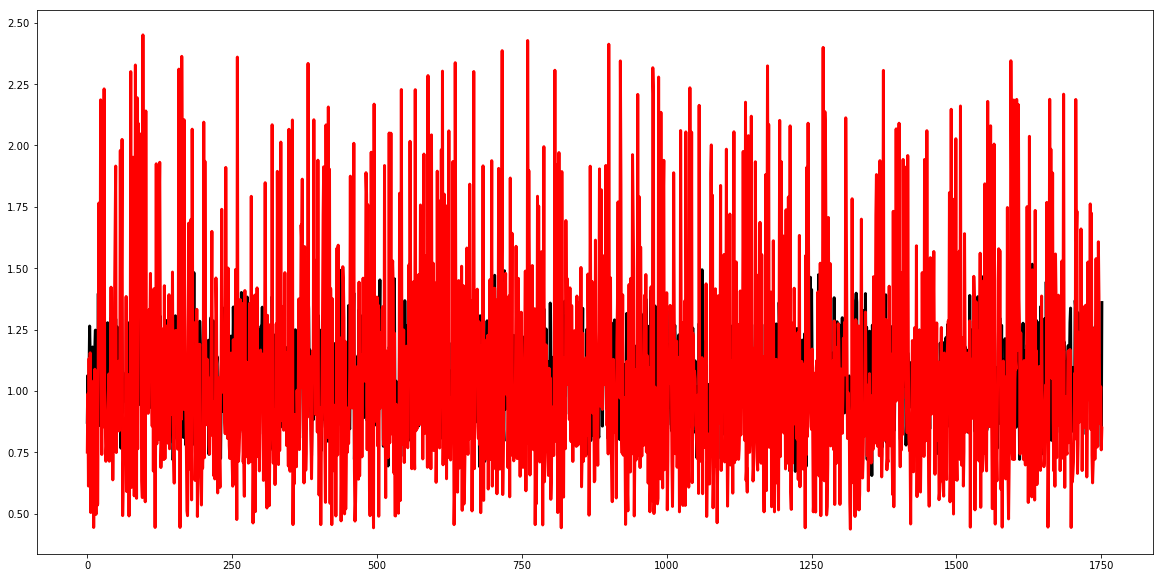

In [19]:
reg=linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0))
reg.fit(x_train,y_train)

prediction= reg.predict(x_test)

print "the alpha is ", reg.alpha_
print "the MSE is ", mean_squared_error(prediction,y_test)

plt.figure(figsize=(20,10))

#plt.scatter(x_test, y_test,  color='black')

plt.plot( prediction, color='k', linewidth=3)
plt.plot(y_test.tolist(), color='r',linewidth=3)
score=reg.score(x_test,y_test)
print score

plt.show()

In [65]:
Xnew = pd.concat(([x1, df_weather_copy[336:]]),axis=1)
Ynew = y1
print Xnew.shape,Ynew.shape

(8424, 10) (8424,)


(6739, 10)
(1685, 10)
(6739,)
(1685,)
the alpha is  0.1
the MSE is  0.00421421290098
0.972696675578


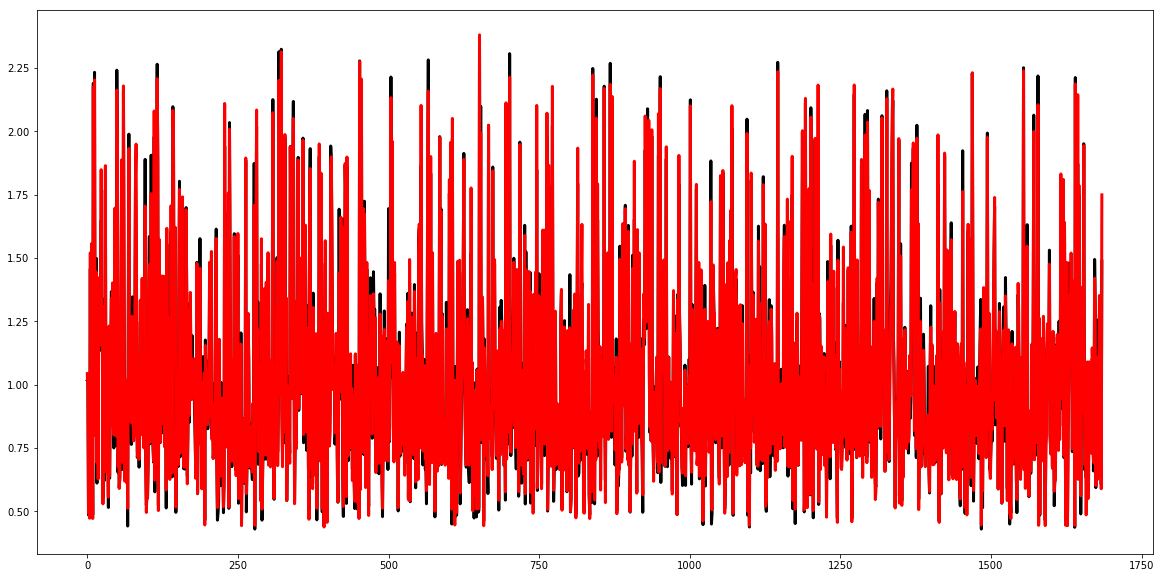

In [67]:
scaler = StandardScaler()
scaler.fit(Xnew.values)
df_new = scaler.transform(Xnew.values)

x_train, x_test, y_train, y_test = train_test_split(df_new, Ynew, test_size=0.2, random_state=1, )
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

reg=linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0))
reg.fit(x_train,y_train)

prediction= reg.predict(x_test)

print "the alpha is ", reg.alpha_
print "the MSE is ", mean_squared_error(prediction,y_test)

plt.figure(figsize=(20,10))

#plt.scatter(x_test, y_test,  color='black')

plt.plot( prediction, color='k', linewidth=3)
plt.plot(y_test.tolist(), color='r',linewidth=3)
score=reg.score(x_test,y_test)
print score

plt.show()